In [29]:
# Adding in CT, NV, RI, SC NW Times

ct_wallclock_times = [35.54, 63.66, 15.07, 4.16] # 5 districts
nv_wallclock_times = [30.73, 233.16, 180.96] # 4 districts
ri_wallclock_times = [7.42] # 2 districts
sc_wallclock_times = [424.59, 386.69, 339.62, 295.06, 137.37, 11.31] # 7 districts

ct_cpu_times = [298.41, 593.05, 115.20, 21.26] # 5 districts
nv_cpu_times = [129.99, 2164.14, 1796.11] # 4 districts
ri_cpu_times = [49.61] # 2 districts
sc_cpu_times = [4095.83, 3635.03, 3175.68, 2948.45, 1265.69, 76.01] # 7 districts

print(sum(ct_wallclock_times))
print(sum(nv_wallclock_times))
print(sum(ri_wallclock_times))
print(sum(sc_wallclock_times))

118.42999999999998
444.85
7.42
1594.6399999999999


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('totalTime.csv')

# Display the first few rows of the DataFrame
print(data.head())
print(len(data))

           state_name  precincts  numDistricts  totaltime label type
0  map_HI_cty_weights        461             2   6.743912    HI  cty
1  map_ID_cty_weights        931             2   9.040797    ID  cty
2  map_ME_cty_weights        401             2   2.764124    ME  cty
3  map_MT_cty_weights        666             2  24.844556    MT  cty
4  map_NH_cty_weights        326             2   3.655928    NH  cty
27


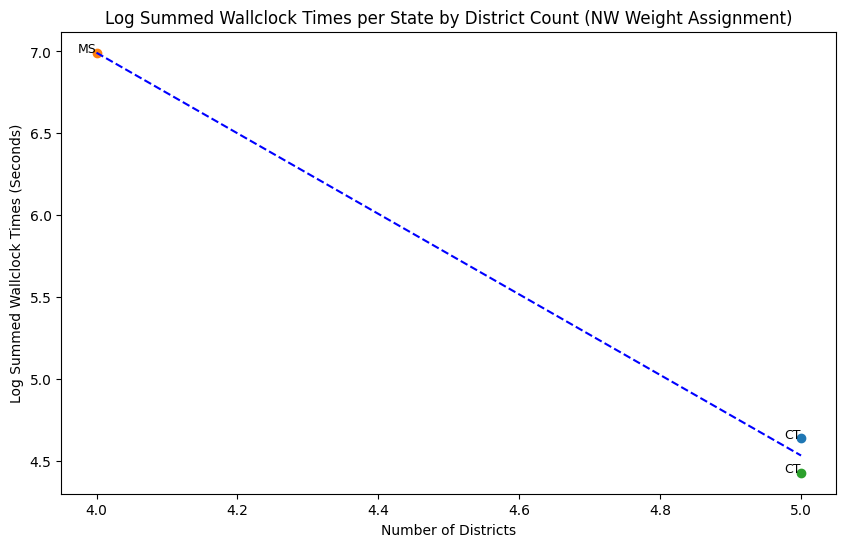

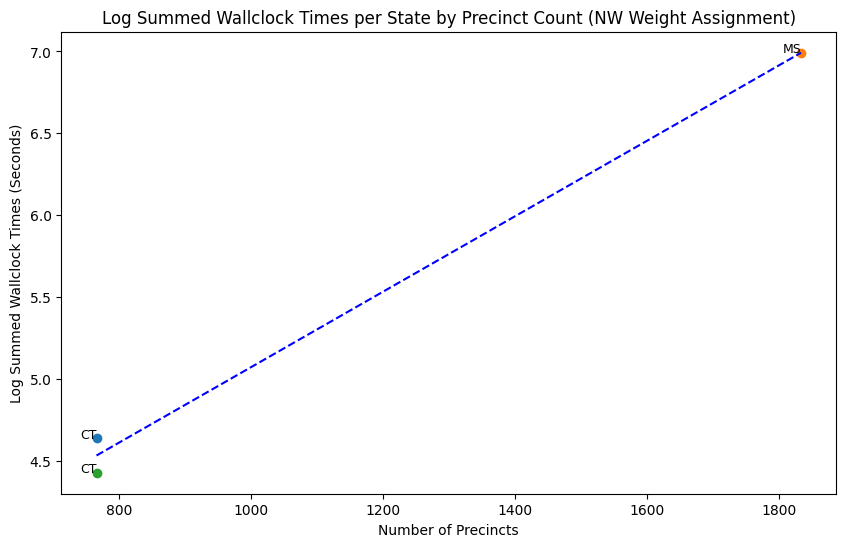

In [31]:
##############
# NW_WEIGHTS #
##############


nw_labels = [label for label, state in zip(data['label'], data['state_name']) if 'nw_weights' in state]
nw_districts = [district for district, state in zip(data['numDistricts'], data['state_name']) if 'nw_weights' in state]
nw_precincts = [precinct for precinct, state in zip(data['precincts'], data['state_name']) if 'nw_weights' in state]
nw_runtimes = [np.log(time) for time, state in zip(data['totaltime'], data['state_name']) if "nw_weights" in state]


# District graph

nw_district_fit = np.polyfit(nw_districts, nw_runtimes, 1)
nw_district_fitline_x = np.linspace(min(nw_districts), max(nw_districts), 100)
nw_district_fitline_y = np.polyval(nw_district_fit,nw_district_fitline_x)

plt.figure(figsize=(10, 6))
for i in range(len(nw_districts)):
    plt.scatter(nw_districts[i], nw_runtimes[i], label=f"{nw_labels[i]} Wallclock")
    plt.text(nw_districts[i], nw_runtimes[i], f"{nw_labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Log Summed Wallclock Times (Seconds)')
plt.title('Log Summed Wallclock Times per State by District Count (NW Weight Assignment)')
plt.plot(nw_district_fitline_x, nw_district_fitline_y, color='blue', linestyle='--', label='Wallclock Fit Line')
# plt.legend()
plt.show()


# Precinct graph

nw_precinct_fit = np.polyfit(nw_precincts, nw_runtimes, 1)
nw_precinct_fitline_x = np.linspace(min(nw_precincts), max(nw_precincts), 100)
nw_precinct_fitline_y = np.polyval(nw_precinct_fit,nw_precinct_fitline_x)

plt.figure(figsize=(10, 6))
for i in range(len(nw_precincts)):
    plt.scatter(nw_precincts[i], nw_runtimes[i], label=f"{nw_labels[i]} Wallclock")
    plt.text(nw_precincts[i], nw_runtimes[i], f"{nw_labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Precincts')
plt.ylabel('Log Summed Wallclock Times (Seconds)')
plt.title('Log Summed Wallclock Times per State by Precinct Count (NW Weight Assignment)')
plt.plot(nw_precinct_fitline_x, nw_precinct_fitline_y, color='blue', linestyle='--', label='Wallclock Fit Line')
# plt.legend()
plt.show()

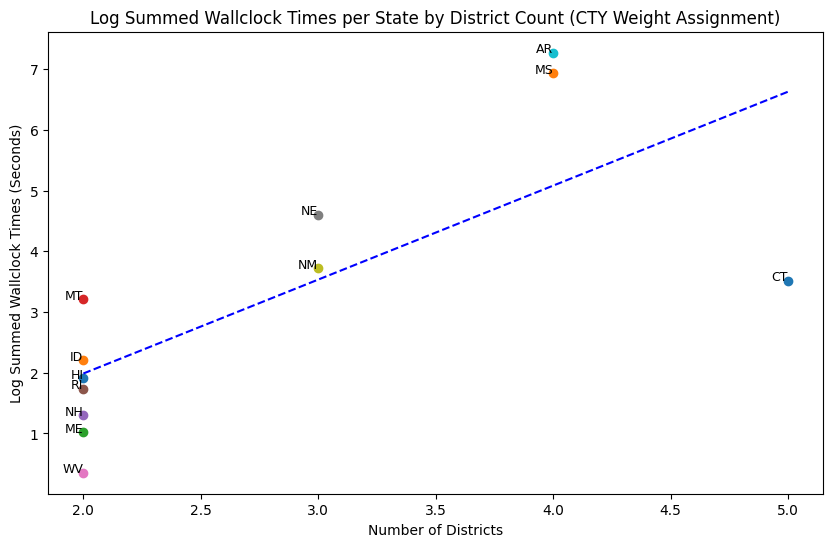

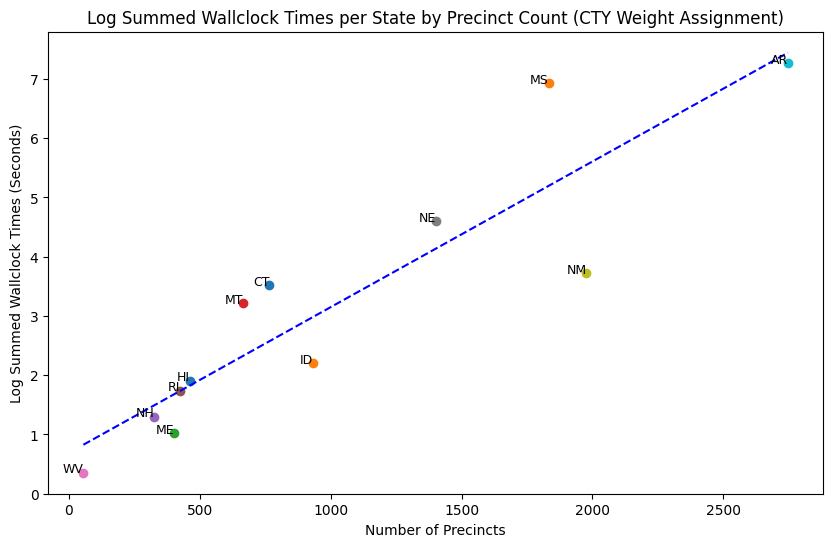

In [32]:
##############
# CTY_WEIGHTS #
##############


cty_labels = [label for label, state in zip(data['label'], data['state_name']) if 'cty_weights' in state]
cty_districts = [district for district, state in zip(data['numDistricts'], data['state_name']) if 'cty_weights' in state]
cty_precincts = [precinct for precinct, state in zip(data['precincts'], data['state_name']) if 'cty_weights' in state]
cty_runtimes = [np.log(time) for time, state in zip(data['totaltime'], data['state_name']) if "cty_weights" in state]


# District graph

cty_district_fit = np.polyfit(cty_districts, cty_runtimes, 1)
cty_district_fitline_x = np.linspace(min(cty_districts), max(cty_districts), 100)
cty_district_fitline_y = np.polyval(cty_district_fit,cty_district_fitline_x)

plt.figure(figsize=(10, 6))
for i in range(len(cty_districts)):
    plt.scatter(cty_districts[i], cty_runtimes[i], label=f"{cty_labels[i]} Wallclock")
    plt.text(cty_districts[i], cty_runtimes[i], f"{cty_labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Log Summed Wallclock Times (Seconds)')
plt.title('Log Summed Wallclock Times per State by District Count (CTY Weight Assignment)')
plt.plot(cty_district_fitline_x, cty_district_fitline_y, color='blue', linestyle='--', label='Wallclock Fit Line')
# plt.legend()
plt.show()


# Precinct graph

cty_precinct_fit = np.polyfit(cty_precincts, cty_runtimes, 1)
cty_precinct_fitline_x = np.linspace(min(cty_precincts), max(cty_precincts), 100)
cty_precinct_fitline_y = np.polyval(cty_precinct_fit,cty_precinct_fitline_x)

plt.figure(figsize=(10, 6))
for i in range(len(cty_precincts)):
    plt.scatter(cty_precincts[i], cty_runtimes[i], label=f"{cty_labels[i]} Wallclock")
    plt.text(cty_precincts[i], cty_runtimes[i], f"{cty_labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Precincts')
plt.ylabel('Log Summed Wallclock Times (Seconds)')
plt.title('Log Summed Wallclock Times per State by Precinct Count (CTY Weight Assignment)')
plt.plot(cty_precinct_fitline_x, cty_precinct_fitline_y, color='blue', linestyle='--', label='Wallclock Fit Line')
# plt.legend()
plt.show()

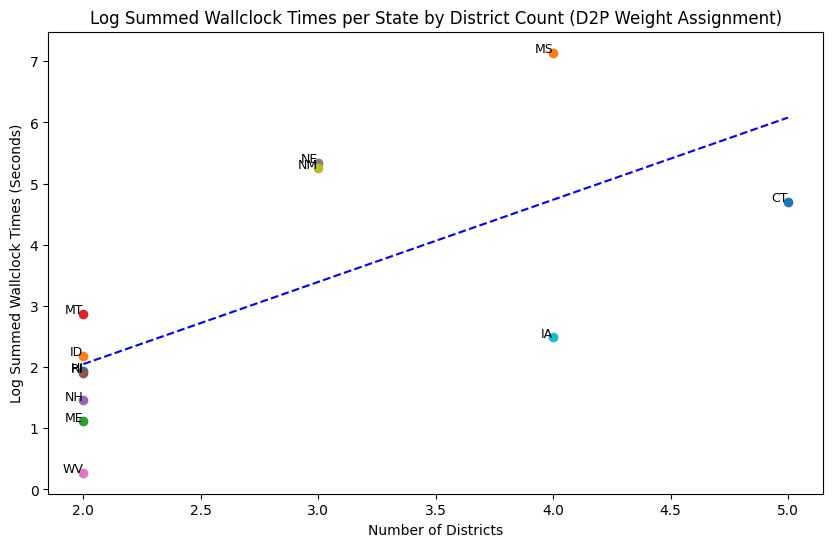

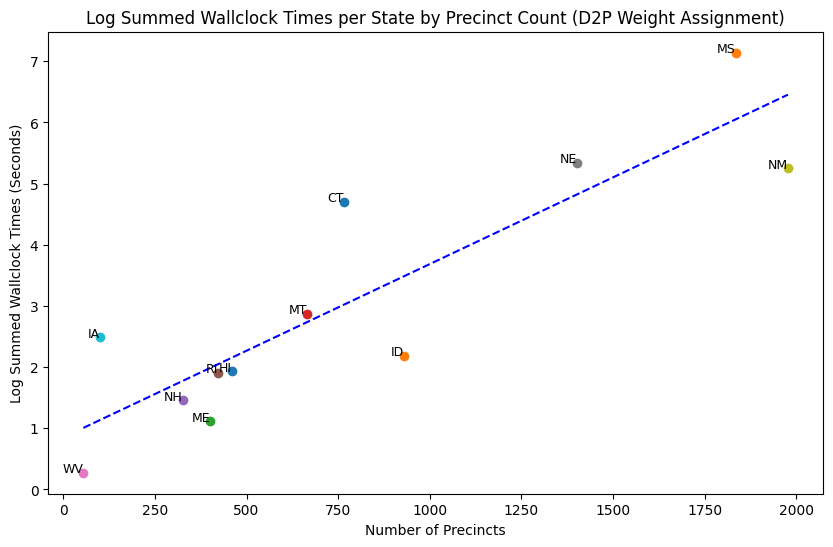

In [33]:
##############
# D2P_WEIGHTS #
##############


d2p_labels = [label for label, state in zip(data['label'], data['state_name']) if 'd2p_weights' in state]
d2p_districts = [district for district, state in zip(data['numDistricts'], data['state_name']) if 'd2p_weights' in state]
d2p_precincts = [precinct for precinct, state in zip(data['precincts'], data['state_name']) if 'd2p_weights' in state]
d2p_runtimes = [np.log(time) for time, state in zip(data['totaltime'], data['state_name']) if "d2p_weights" in state]


# District graph

d2p_district_fit = np.polyfit(d2p_districts, d2p_runtimes, 1)
d2p_district_fitline_x = np.linspace(min(d2p_districts), max(d2p_districts), 100)
d2p_district_fitline_y = np.polyval(d2p_district_fit,d2p_district_fitline_x)

plt.figure(figsize=(10, 6))
for i in range(len(d2p_districts)):
    plt.scatter(d2p_districts[i], d2p_runtimes[i], label=f"{d2p_labels[i]} Wallclock")
    plt.text(d2p_districts[i], d2p_runtimes[i], f"{d2p_labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Log Summed Wallclock Times (Seconds)')
plt.title('Log Summed Wallclock Times per State by District Count (D2P Weight Assignment)')
plt.plot(d2p_district_fitline_x, d2p_district_fitline_y, color='blue', linestyle='--', label='Wallclock Fit Line')
# plt.legend()
plt.show()


# Precinct graph

d2p_precinct_fit = np.polyfit(d2p_precincts, d2p_runtimes, 1)
d2p_precinct_fitline_x = np.linspace(min(d2p_precincts), max(d2p_precincts), 100)
d2p_precinct_fitline_y = np.polyval(d2p_precinct_fit,d2p_precinct_fitline_x)

plt.figure(figsize=(10, 6))
for i in range(len(d2p_precincts)):
    plt.scatter(d2p_precincts[i], d2p_runtimes[i], label=f"{d2p_labels[i]} Wallclock")
    plt.text(d2p_precincts[i], d2p_runtimes[i], f"{d2p_labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Precincts')
plt.ylabel('Log Summed Wallclock Times (Seconds)')
plt.title('Log Summed Wallclock Times per State by Precinct Count (D2P Weight Assignment)')
plt.plot(d2p_precinct_fitline_x, d2p_precinct_fitline_y, color='blue', linestyle='--', label='Wallclock Fit Line')
# plt.legend()
plt.show()

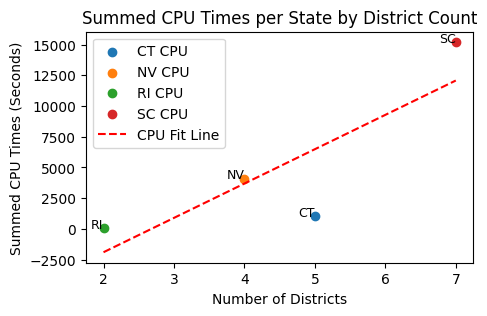

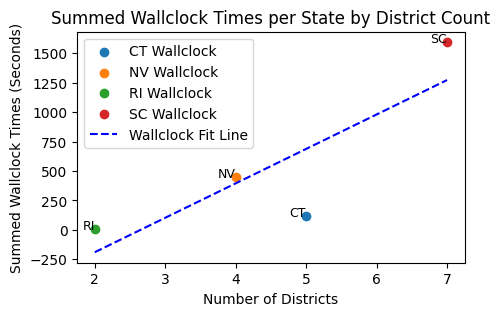

In [2]:
#######
# OLD #
#######

# Summing the times
wallclock_sums = [sum(ct_wallclock_times), sum(nv_wallclock_times), sum(ri_wallclock_times), sum(sc_wallclock_times)]
cpu_sums = [sum(ct_cpu_times), sum(nv_cpu_times), sum(ri_cpu_times), sum(sc_cpu_times)]

# Number of districts
districts = [5, 4, 2, 7]

# Labels for the points
labels = ['CT', 'NV', 'RI', 'SC']

# Calculate fit lines
wallclock_fit = np.polyfit(districts, wallclock_sums, 1)  # Linear fit for wallclock times
cpu_fit = np.polyfit(districts, cpu_sums, 1)  # Linear fit for cpu times

fit_line_x = np.linspace(min(districts), max(districts), 100)
# Calculate the y values for the fit lines
wallclock_fit_line_y = np.polyval(wallclock_fit, fit_line_x)
cpu_fit_line_y = np.polyval(cpu_fit, fit_line_x)

# CPU
plt.figure(figsize=(5, 3))
for i in range(len(districts)):
    plt.scatter(districts[i], cpu_sums[i], label=f"{labels[i]} CPU")
    plt.text(districts[i], cpu_sums[i], f"{labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Summed CPU Times (Seconds)')
plt.title('Summed CPU Times per State by District Count')
plt.plot(fit_line_x, cpu_fit_line_y, color='red', linestyle='--', label='CPU Fit Line')
plt.legend()
plt.show()

# Wallclock
plt.figure(figsize=(5, 3))
for i in range(len(districts)):
    plt.scatter(districts[i], wallclock_sums[i], label=f"{labels[i]} Wallclock")
    plt.text(districts[i], wallclock_sums[i], f"{labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Summed Wallclock Times (Seconds)')
plt.title('Summed Wallclock Times per State by District Count')
plt.plot(fit_line_x, wallclock_fit_line_y, color='blue', linestyle='--', label='Wallclock Fit Line')
plt.legend()
plt.show()